In [393]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from datetime import datetime
import math
import locale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from xgboost import XGBRegressor, DMatrix
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt 
from statistics import mean

In [394]:
from sklearn.metrics import log_loss

In [395]:
from sklearn.metrics import explained_variance_score

In [396]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.svm import SVR

In [397]:
from sklearn.metrics import mean_absolute_error 

In [398]:
pd.set_option("display.max_columns", 100)

In [399]:
locale.setlocale(locale.LC_ALL, 'de_DE')

'de_DE'

In [400]:
X_train_filename = 'X_train.pkl'

In [401]:
X_test_filename = "X_test.pkl"

In [402]:
Y_train_filename = "Y_train.pkl"

In [403]:
Y_test_filename = "Y_test.pkl"

In [404]:
X_train = pd.read_pickle(X_train_filename)

In [405]:
X_test = pd.read_pickle(X_test_filename)

In [406]:
Y_train = pd.read_pickle(Y_train_filename)

In [407]:
Y_test = pd.read_pickle(Y_test_filename)

## XBOOST REGRESSION

In [408]:
params = {'max_depth':2, 'learning_rate': 0.1, 'verbose_eval': 4, 'early_stopping_rounds':10, 'n_estimators': 100}

In [409]:
model = XGBRegressor(**params)

In [410]:
model.fit(X_train.to_numpy(), Y_train.to_numpy())

XGBRegressor(base_score=None, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbose_eval=4, verbosity=None)

In [411]:
train_pred =  model.predict(X_train.to_numpy())

In [412]:
explained_variance_score(Y_train.to_numpy(),train_pred)

0.9475070429891549

In [413]:
mean_absolute_error(Y_train.to_numpy(),train_pred)

25.618914376052032

In [414]:
test_pred = model.predict(X_test.to_numpy())

In [415]:
explained_variance_score(Y_test.to_numpy(), test_pred)

0.9396977981099907

In [416]:
mean_absolute_error(Y_test.to_numpy(), test_pred)

29.77127428713555

In [417]:
model.predict(X_test.to_numpy())[0:10]

array([108.72741 ,  47.902565,  50.9816  , 133.08102 ,  48.774315,
        47.9279  , 312.95615 ,  74.44746 ,  66.82995 , 172.32239 ],
      dtype=float32)

In [418]:
Y_test.to_numpy()[0:10]

array([100.  ,  41.5 ,  59.99, 130.  ,  83.  ,  37.  , 290.  ,  60.  ,
        99.  , 140.  ])

## BASE LINE

In [419]:
explained_variance_score(Y_train.to_numpy(),X_train['mean_price'].to_numpy())

0.9398374058197002

In [420]:
explained_variance_score(Y_test.to_numpy(),X_test['mean_price'].to_numpy())

0.9395546953222932

## GRID

In [115]:
parameters =    {
            'max_depth': [1, 2, 3, 4, 5, 10],
            'learning_rate': [0.001, 0.005, 0.1, 0.3, 0.4, 0.8],
            'n_estimators': [20, 50, 100, 150],
            'early_stopping_rounds':[10]
            }

In [116]:

xgb_model = XGBRegressor(silent = True)

clf = GridSearchCV(xgb_model, parameters, scoring = 'explained_variance', verbose=3, n_jobs=2, cv = 10)

clf.fit(X_train.to_numpy(), Y_train.to_numpy())

Fitting 5 folds for each of 144 candidates, totalling 720 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    4.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:   24.8s
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:   59.9s
[Parallel(n_jobs=2)]: Done 508 tasks      | elapsed:  3.0min
[Parallel(n_jobs=2)]: Done 720 out of 720 | elapsed:  5.8min finished


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, silent=True,
                                    subsample=None, tree_method=None,
  

In [118]:


print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
            % (mean, std * 2, params))

Best parameters set found on development set:

{'early_stopping_rounds': 10, 'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}

Grid scores on development set:

0.025 (+/-0.002) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 20}
0.060 (+/-0.006) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 50}
0.115 (+/-0.011) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 100}
0.164 (+/-0.014) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 150}
0.034 (+/-0.001) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 20}
0.083 (+/-0.002) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 50}
0.159 (+/-0.004) for {'early_stopping_rounds': 10, 'learning_rate': 0.001, 'max_depth': 2, 'n_estimators': 100}
0.227 (+/-0.005) for {'early_stopping_rounds': 10,

## CHECK MANUALLY

In [315]:
X = X_test.iloc[0].copy()

In [316]:
type(X)

pandas.core.series.Series

In [317]:
X

model_iphone_11                        0.000000
model_iphone_11_pro                    0.000000
model_iphone_11_pro_max                0.000000
model_iphone_5                         0.000000
model_iphone_5c                        0.000000
model_iphone_5s                        0.000000
model_iphone_6                         0.000000
model_iphone_6_plus                    0.000000
model_iphone_6s                        0.000000
model_iphone_6s_plus                   0.000000
model_iphone_7                         1.000000
model_iphone_7_plus                    0.000000
model_iphone_8                         0.000000
model_iphone_8_plus                    0.000000
model_iphone_se                        0.000000
model_iphone_se_2                      0.000000
model_iphone_x                         0.000000
model_iphone_xr                        0.000000
model_iphone_xs                        0.000000
model_iphone_xs_max                    0.000000
color_blau                             0

In [280]:
X.listing_was_active_before_closure = 5

In [326]:
X.to_numpy()

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   1.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         4.99      , 537.        , 100.        ,   7.        ,
         0.        ,   1.        , 123.73866242])

In [327]:
model.predict(np.array([X]))[0]

108.578514

In [275]:
X.listing_was_active_before_closure = 6

In [251]:
X.shipping_cost = 4.55

In [252]:
X.very_good_condition = 0

In [253]:
X.very_bad_condition = 0

In [254]:
X.no_feedback_yet = 0

In [255]:
X.selers_feedback = 100

In [256]:
X.number_of_reviews = 40

In [263]:
X.return_policy_no_return = 0

In [264]:
X.return_policy_buyer_pays = 1

In [328]:
results = []
X_axis = []

In [329]:
for i in range(35):
    X.listing_was_active_before_closure = i
    res = model.predict(np.array([X]))[0]
    X_axis.append(i)
    print(res)
    results.append(res)

119.89558
119.89558
119.89558
119.29621
119.29621
119.29621
119.29621
108.578514
119.437004
119.437004
119.437004
122.13986
122.13986
122.13986
122.13986
122.13986
122.13986
122.13986
122.13986
122.13986
122.13986
125.31351
125.31351
125.31351
129.38379
137.71405
145.462
145.462
152.32455
152.32455
160.97076
160.97076
160.97076
160.97076
160.97076


In [182]:
len(results)

65

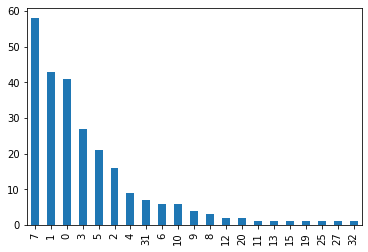

In [287]:
pd.value_counts(X_train.loc[X_train.model_iphone_xs == 1, 'listing_was_active_before_closure']).plot.bar()

In [285]:
X_train.loc[X_train.model_iphone_6 == 1, 'listing_was_active_before_closure'].mean()

5.2679245283018865

In [336]:
X_train.loc[X_train.model_iphone_6 == 1, 'listing_was_active_before_closure'].median()

5.0

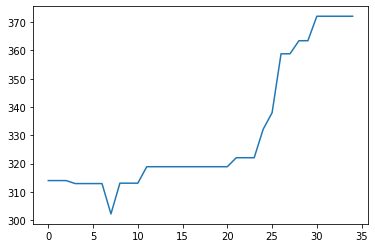

In [286]:
plt.plot(X_axis, results) 

In [171]:
X_axis = range(30)

In [172]:
X_axis

range(0, 30)

In [397]:
#X_test = X_test.drop(['condition', 'title', 'very_good_condition', 'very_bad_condition'], axis=1)

In [162]:
model = XGBClassifier(**params)

In [163]:
eval_set = [(X_test.to_numpy(), Y_test.to_numpy())]

In [164]:
model.fit(X_train.to_numpy(), Y_train.to_numpy(), eval_metric="mlogloss", eval_set=eval_set, verbose=True)

[0]	validation_0-mlogloss:0.91953
[1]	validation_0-mlogloss:0.87399
[2]	validation_0-mlogloss:0.85535
[3]	validation_0-mlogloss:0.85092
[4]	validation_0-mlogloss:0.85067
[5]	validation_0-mlogloss:0.84959
[6]	validation_0-mlogloss:0.85498
[7]	validation_0-mlogloss:0.85700
[8]	validation_0-mlogloss:0.85895
[9]	validation_0-mlogloss:0.85886
[10]	validation_0-mlogloss:0.86458
[11]	validation_0-mlogloss:0.86676
[12]	validation_0-mlogloss:0.86895
[13]	validation_0-mlogloss:0.86912
[14]	validation_0-mlogloss:0.86872
[15]	validation_0-mlogloss:0.86923
[16]	validation_0-mlogloss:0.87074
[17]	validation_0-mlogloss:0.86291
[18]	validation_0-mlogloss:0.86628
[19]	validation_0-mlogloss:0.86222
[20]	validation_0-mlogloss:0.86435
[21]	validation_0-mlogloss:0.86597
[22]	validation_0-mlogloss:0.87201
[23]	validation_0-mlogloss:0.87147
[24]	validation_0-mlogloss:0.87202
[25]	validation_0-mlogloss:0.87405
[26]	validation_0-mlogloss:0.87077
[27]	validation_0-mlogloss:0.87192
[28]	validation_0-mlogloss:0.8

XGBClassifier(base_score=None, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints=None, learning_rate=0.8, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbose_eval=4,
              verbosity=None)

## Check feature importance

In [289]:
columns = list(X_test)

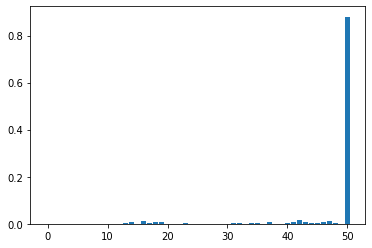

In [113]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [114]:
print(model.feature_importances_)
for c in range(len(columns)):
    print(columns[c])
    print(model.feature_importances_[c])

[3.6310303e-04 2.2448502e-04 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.1314582e-04
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3069425e-03 6.6854963e-03
 0.0000000e+00 1.0810534e-02 2.2037786e-03 7.3426985e-03 6.1546536e-03
 0.0000000e+00 0.0000000e+00 1.2047818e-03 2.3224438e-03 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.7957317e-03 1.3436743e-03 0.0000000e+00 3.2531566e-03
 1.6910894e-03 1.2093583e-04 7.7643362e-03 5.9137249e-04 0.0000000e+00
 3.5388581e-03 8.9234598e-03 1.5268227e-02 8.0341585e-03 4.3294001e-03
 4.7012344e-03 5.8587869e-03 1.1050189e-02 3.1657531e-03 0.0000000e+00
 8.7983757e-01]
model_iphone_11
0.00036310303
model_iphone_11_pro
0.00022448502
model_iphone_11_pro_max
0.0
model_iphone_5
0.0
model_iphone_5c
0.0
model_iphone_5s
0.0
model_iphone_6
0.0
model_iphone_6_plus
0.0
model_iphone_6s
0.0
model_iphone_6s_plus
0.00011314582
model_iphone_7
0.0
model_

## SAVE MODEL ON DISK

In [291]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [292]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test.to_numpy(), Y_test.to_numpy())
print(result)

0.9395213784850837


In [293]:
model_enc_prices = pickle.load(open("model_enc_prices", 'rb'))

In [294]:
mean_prices = pickle.load(open("mean_prices", 'rb'))

In [423]:
median_active_days = pickle.load(open("median_active_days", 'rb'))

In [295]:
columns = list(X_test)

In [296]:
filename = 'columns.sav'
pickle.dump(columns, open(filename, 'wb'))

In [297]:
columns

['model_iphone_11',
 'model_iphone_11_pro',
 'model_iphone_11_pro_max',
 'model_iphone_5',
 'model_iphone_5c',
 'model_iphone_5s',
 'model_iphone_6',
 'model_iphone_6_plus',
 'model_iphone_6s',
 'model_iphone_6s_plus',
 'model_iphone_7',
 'model_iphone_7_plus',
 'model_iphone_8',
 'model_iphone_8_plus',
 'model_iphone_se',
 'model_iphone_se_2',
 'model_iphone_x',
 'model_iphone_xr',
 'model_iphone_xs',
 'model_iphone_xs_max',
 'color_blau',
 'color_gelb',
 'color_gold',
 'color_grau',
 'color_grun',
 'color_lila',
 'color_orange',
 'color_other',
 'color_rosa',
 'color_rosagold',
 'color_rot',
 'color_schwarz',
 'color_silber',
 'color_spacegrau',
 'color_weiss',
 'memory_128GB',
 'memory_16GB',
 'memory_256GB',
 'memory_32GB',
 'memory_512GB',
 'memory_64GB',
 'no_feedback_yet',
 'very_good_condition',
 'very_bad_condition',
 'shipping_cost',
 'number_of_reviews',
 'selers_feedback',
 'listing_was_active_before_closure',
 'return_policy_buyer_pays',
 'return_policy_no_return',
 'mean_

In [298]:
x = X_train.iloc[0].copy()

In [299]:
data_for_model = np.zeros(x.shape[0])

In [332]:
res = {'model': 'model_iphone_7', 'color': 'color_schwarz', 'memory': '128', 'return_policy': 'return_policy_no_return',
       'no_feedback_yet': False, 'selers_feedback': '100', 'price': 2000, 'shipping_cost': '4.99',
       'number_of_reviews': '537', 'condition': 0}

"condition" in response means: 0  avarage, -1 very bad, 1 very good

In [319]:
def set_mean_price(row):
    price = mean_prices.loc[(mean_prices.model == row["model"]) & (mean_prices.memory  == "memory_{}GB".format(row["memory"])) 
                            & (mean_prices.color == row["color"])].total_price
    if (price.shape[0] == 0):
        price = mean_prices.loc[(mean_prices.model == row["model"]) & (mean_prices.memory  == "memory_{}GB".format(row["memory"]))].total_price
    if (price.shape[0] == 0):
        price = mean_prices.loc[mean_prices.model == row["model"]].total_price

    return price.iloc[0]

In [320]:
def set_return_policy(res):
    #it's a workaround. Currently for all types of return we have "return_policy_buyer_pays" in data (Because of teh bug). 
    if (res["return_policy"] != "return_policy_no_return"):
        res["return_policy"] = "return_policy_buyer_pays"

In [321]:
def set_feedback(res):
    if (res["no_feedback_yet"]):
        res["no_feedback_yet"] = 1
        res["selers_feedback"] = 100
        res["number_of_reviews"] = 0 #todo. actually it's also a number of very old reviews. Check may be it's beter to put and avareage of oldreviews there.
    else:
        res["no_feedback_yet"] = 0

In [330]:
def prepare_request(res, columns = columns):
    all_colors = [x for x in columns if 'color_' in x]
    if not(res["color"] in all_colors):
        res["color"] = "color_other"
    set_return_policy(res)
    set_feedback(res)
    data_for_model = np.zeros(len(columns))
    categorical = ["color", "return_policy", "model"]
    for cat in categorical:
        print(cat)
        print(res[cat])
        data_for_model[columns.index(res[cat])] = 1
    data_for_model[columns.index("memory_{}GB".format(res["memory"]))] = 1
    numerical = ["no_feedback_yet", "selers_feedback", "shipping_cost", "number_of_reviews"]
    for num in numerical:
        print(num)
        data_for_model[columns.index(num)] = res[num]
    data_for_model[columns.index("mean_price")] = set_mean_price(res)
    if res["condition"] == 1:
      data_for_model[columns.index("very_good_condition")] = 1
    elif res["condition"] == -1:
      data_for_model[columns.index("very_bad_condition")] = 1
    return data_for_model

In [483]:
def get_number_of_expected_days(row):
    selected = median_active_days.loc[(median_active_days.model == row["model"]) & (median_active_days.memory  == "memory_{}GB".format(row["memory"])) 
                            & (median_active_days.color == row["color"])]
    days = selected["median"]
    
    if ((days.shape[0] == 0) | (selected["count"].iloc[0] < 10)): #if there are less than 10 examples, it could misleading
        selected = median_active_days.loc[(median_active_days.model == row["model"]) & (median_active_days.memory  == "memory_{}GB".format(row["memory"]))]
        days = selected["median"]
    if ((days.shape[0] == 0) | (selected["count"].iloc[0] < 10)):
        days = median_active_days.loc[median_active_days.model == row["model"]]["median"]
    
    days = int(round(days.iloc[0], 0))
    
    #never take the day 7. Some people choose 'decrease pricie on the day 7', as the result, data is corrpted at this day

    return 6 if days == 7 else days
    

In [465]:
median_active_days.loc[median_active_days.model == "model_iphone_7"]

,model,memory,color,median,count
156,model_iphone_7,memory_128GB,color_gold,2.0,20
157,model_iphone_7,memory_128GB,color_other,6.5,4
158,model_iphone_7,memory_128GB,color_rosa,5.5,26
159,model_iphone_7,memory_128GB,color_rosagold,12.0,2
160,model_iphone_7,memory_128GB,color_rot,2.5,10
161,model_iphone_7,memory_128GB,color_schwarz,5.0,156
162,model_iphone_7,memory_128GB,color_silber,4.0,21
163,model_iphone_7,memory_128GB,color_weiß,1.0,1
164,model_iphone_7,memory_256GB,color_gold,2.0,1
165,model_iphone_7,memory_256GB,color_rosa,7.0,5


In [333]:
prepared_data = prepare_request(res, columns)

color
color_schwarz
return_policy
return_policy_no_return
model
model_iphone_7
no_feedback_yet
selers_feedback
shipping_cost
number_of_reviews


#### TEST

In [490]:
prepared_data[columns.index("listing_was_active_before_closure")] = get_number_of_expected_days(res)

In [491]:
for c in range(len(columns)):
    print(columns[c])
    print(prepared_data[c])

model_iphone_11
0.0
model_iphone_11_pro
0.0
model_iphone_11_pro_max
0.0
model_iphone_5
0.0
model_iphone_5c
0.0
model_iphone_5s
0.0
model_iphone_6
0.0
model_iphone_6_plus
0.0
model_iphone_6s
0.0
model_iphone_6s_plus
0.0
model_iphone_7
1.0
model_iphone_7_plus
0.0
model_iphone_8
0.0
model_iphone_8_plus
0.0
model_iphone_se
0.0
model_iphone_se_2
0.0
model_iphone_x
0.0
model_iphone_xr
0.0
model_iphone_xs
0.0
model_iphone_xs_max
0.0
color_blau
0.0
color_gelb
0.0
color_gold
0.0
color_grau
0.0
color_grun
0.0
color_lila
0.0
color_orange
0.0
color_other
0.0
color_rosa
0.0
color_rosagold
0.0
color_rot
0.0
color_schwarz
1.0
color_silber
0.0
color_spacegrau
0.0
color_weiss
0.0
memory_128GB
1.0
memory_16GB
0.0
memory_256GB
0.0
memory_32GB
0.0
memory_512GB
0.0
memory_64GB
0.0
no_feedback_yet
0.0
very_good_condition
0.0
very_bad_condition
0.0
shipping_cost
4.99
number_of_reviews
537.0
selers_feedback
100.0
listing_was_active_before_closure
5.0
return_policy_buyer_pays
0.0
return_policy_no_return
1.0
me

In [495]:
round(model.predict(np.array([prepared_data]))[0])

119